# Assignment 4(due on 12/06)

## Student:程汉鑫（12332313），Gtihub：NORTH-STAR
## 批改人：吴昊天


## 得分：31/30

In [1]:
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

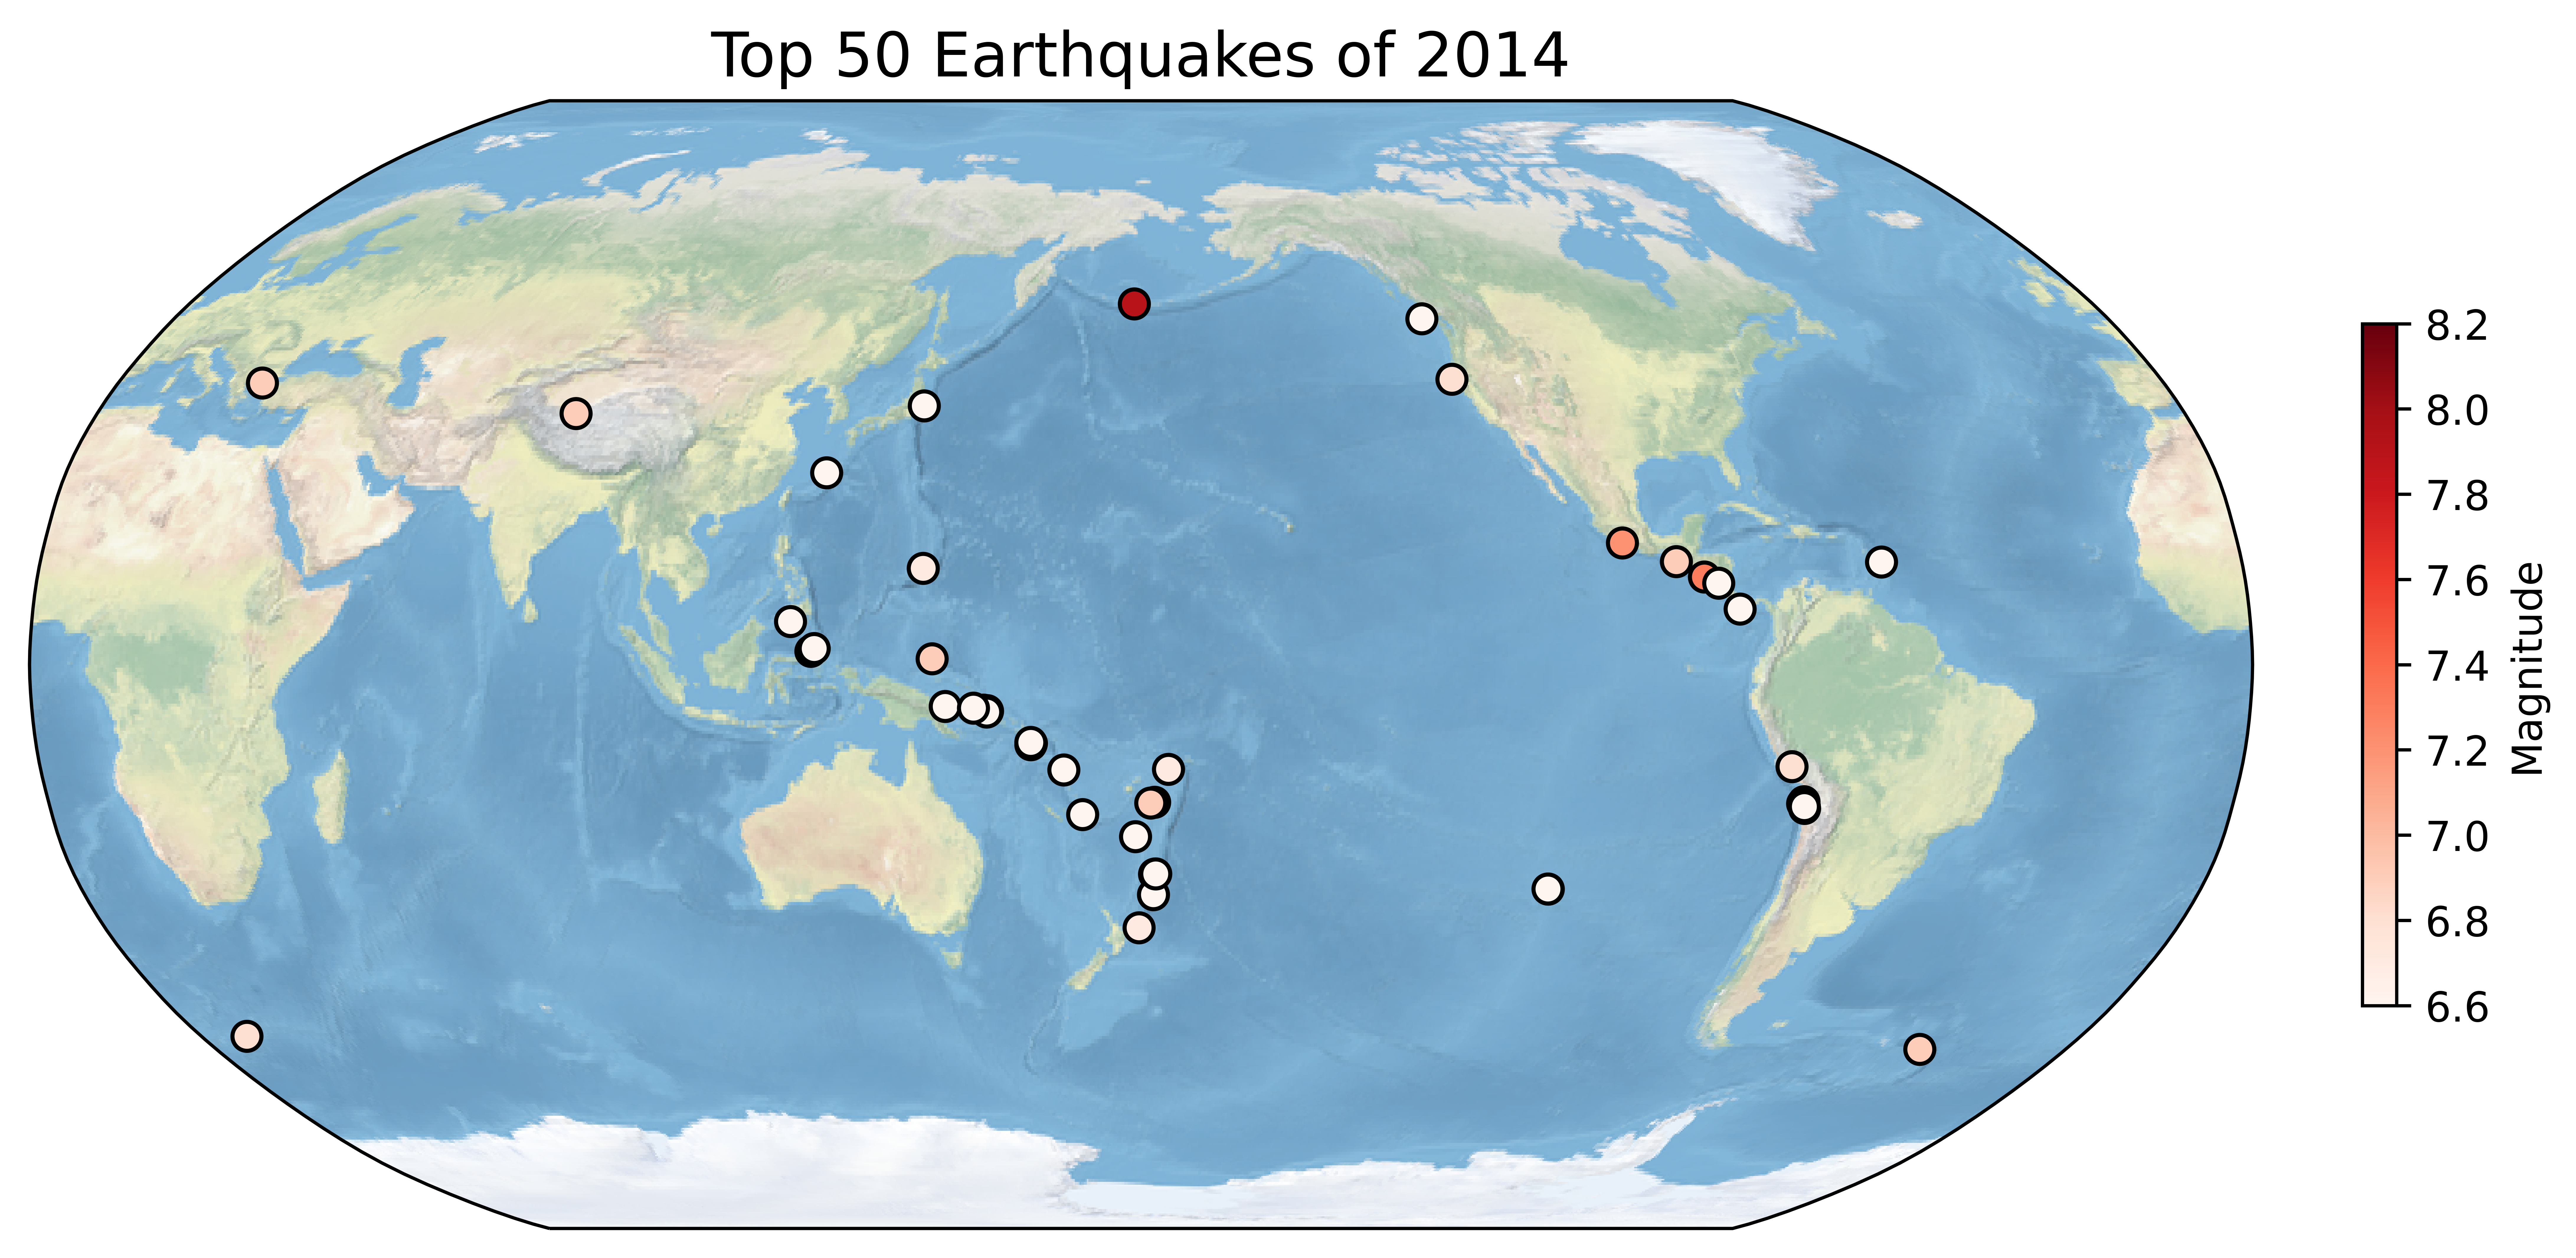

In [2]:
#Question 1

earthquakes = pd.read_csv('usgs_earthquakes.csv')

# 按震级降序排列DataFrame，并取前50行
top_50_earthquakes = earthquakes.sort_values('mag', ascending=False).head(50)

# 创建一个使用罗宾逊投影的图表
fig = plt.figure(figsize=(12, 12), dpi=1000)
projection = ccrs.Robinson(central_longitude=180, globe=None)
ax = plt.axes(projection=projection)
ax.set_global()
ax.stock_img()

# 提取经度和纬度
lon = top_50_earthquakes.longitude
lat = top_50_earthquakes.latitude

#坐标转换方式（'transform=ccrs.PlateCarree()'，表示使用PlateCarree投影）
scatter = ax.scatter(lon, lat, c=top_50_earthquakes.mag, s=50, marker='o', cmap='Reds', vmin=6.6, vmax=8.2, edgecolors='k', transform=ccrs.PlateCarree())

# 添加颜色条
colorbar = plt.colorbar(scatter, ax=ax, shrink=0.25, pad=0.04, label='Magnitude')

plt.title('Top 50 Earthquakes of 2014', fontsize=15)
plt.show()

### 第一题代码运行正常，图件正确。
### 得分：10/10
### --------------------------------------------------------------------------------------------

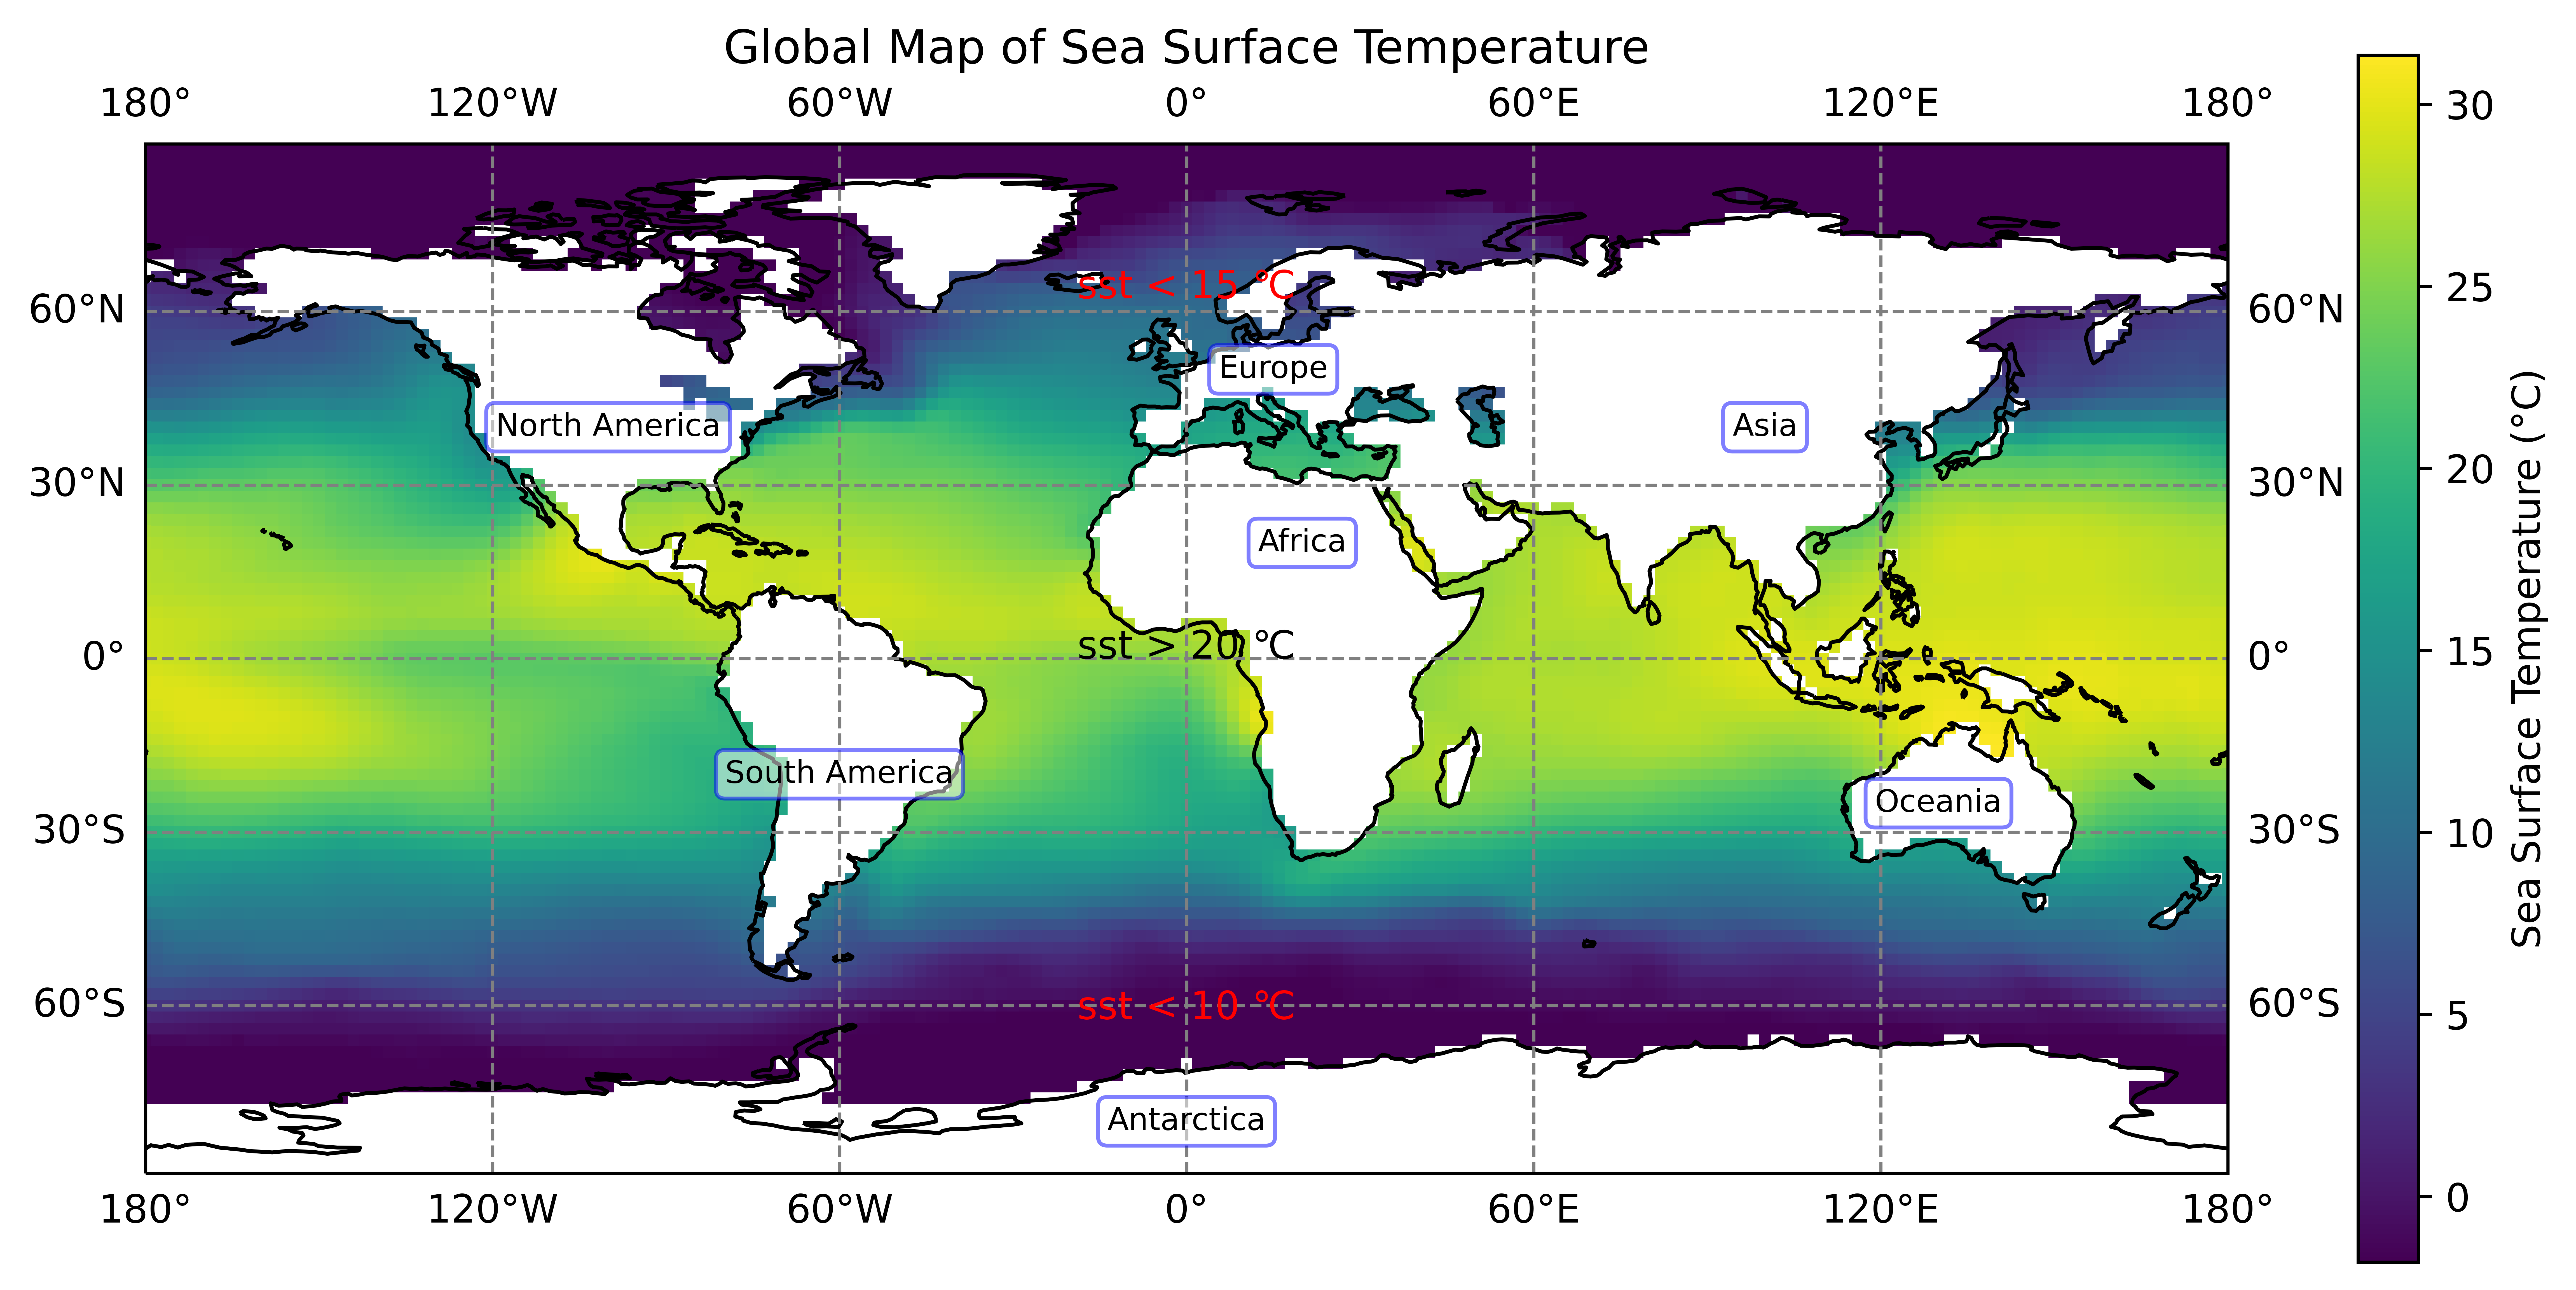

In [4]:
#Question 2.1

ds = xr.open_dataset("sst.mnmean.v4.nc", engine="netcdf4")
data = ds['sst']
#https://zhuanlan.zhihu.com/p/660009602
# 使用 PlateCarree 投影
fig, ax = plt.subplots(figsize=(12, 8), dpi=1000, subplot_kw={'projection': ccrs.PlateCarree()})
#使用 pcolormesh 方法绘制海表温度的颜色图
c = ax.pcolormesh(data['lon'], data['lat'], data.isel(time=10), cmap='viridis', transform=ccrs.PlateCarree())

# 设置标签
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Global Map of Sea Surface Temperature')

# 加入背景网格线
ax.gridlines(draw_labels=True, linestyle='--', color='gray')

# 加入颜色条垂直右侧
cb = plt.colorbar(c, label='Sea Surface Temperature (°C)', orientation='vertical', shrink=0.7)

#加上大陆板框的海岸线，加入国家线的时候需要下载地图，解压之后一直运用不了
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# 在地图不同温度区域加上注释
ax.annotate('sst < 15 ℃', xy=(0.5, 0.85), xycoords='axes fraction', fontsize=10, ha='center',color='red')
ax.annotate('sst > 20 ℃', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=10, ha='center')
ax.annotate('sst < 10 ℃', xy=(0.5, 0.15), xycoords='axes fraction', fontsize=10, ha='center',color='red')

# 创建一个包含所有大陆的字典
continent_names = {'NA': 'North America', 'SA': 'South America', 'EU': 'Europe', 'AF': 'Africa', 'AS': 'Asia', 'OC': 'Oceania', 'AN': 'Antarctica'}

# 大陆的位置根据经纬度调整
coordinates = {'NA': (40, -100), 'SA': (-20, -60), 'EU': (50, 15), 'AF': (20, 20), 'AS': (40, 100), 'OC': (-25, 130), 'AN': (-80, 0)}

# 建立一个循环来遍历大陆名插入文本框
#code是大陆的代号，在字典中循环
for code, name in continent_names.items():
    #根据当前大陆的代号获取其中心的纬度
    lat_center, lon_center = coordinates[code]
    
    text_box_content = name
    #其中包含圆形边框、白色背景、蓝色边缘和透明度为0.5。
    props = dict(boxstyle='round', facecolor='white', edgecolor='blue', alpha=0.5)
    ax.text(lon_center, lat_center, text_box_content, transform=ccrs.PlateCarree(), fontsize=8, verticalalignment='center', ha='center', bbox=props)

plt.show()

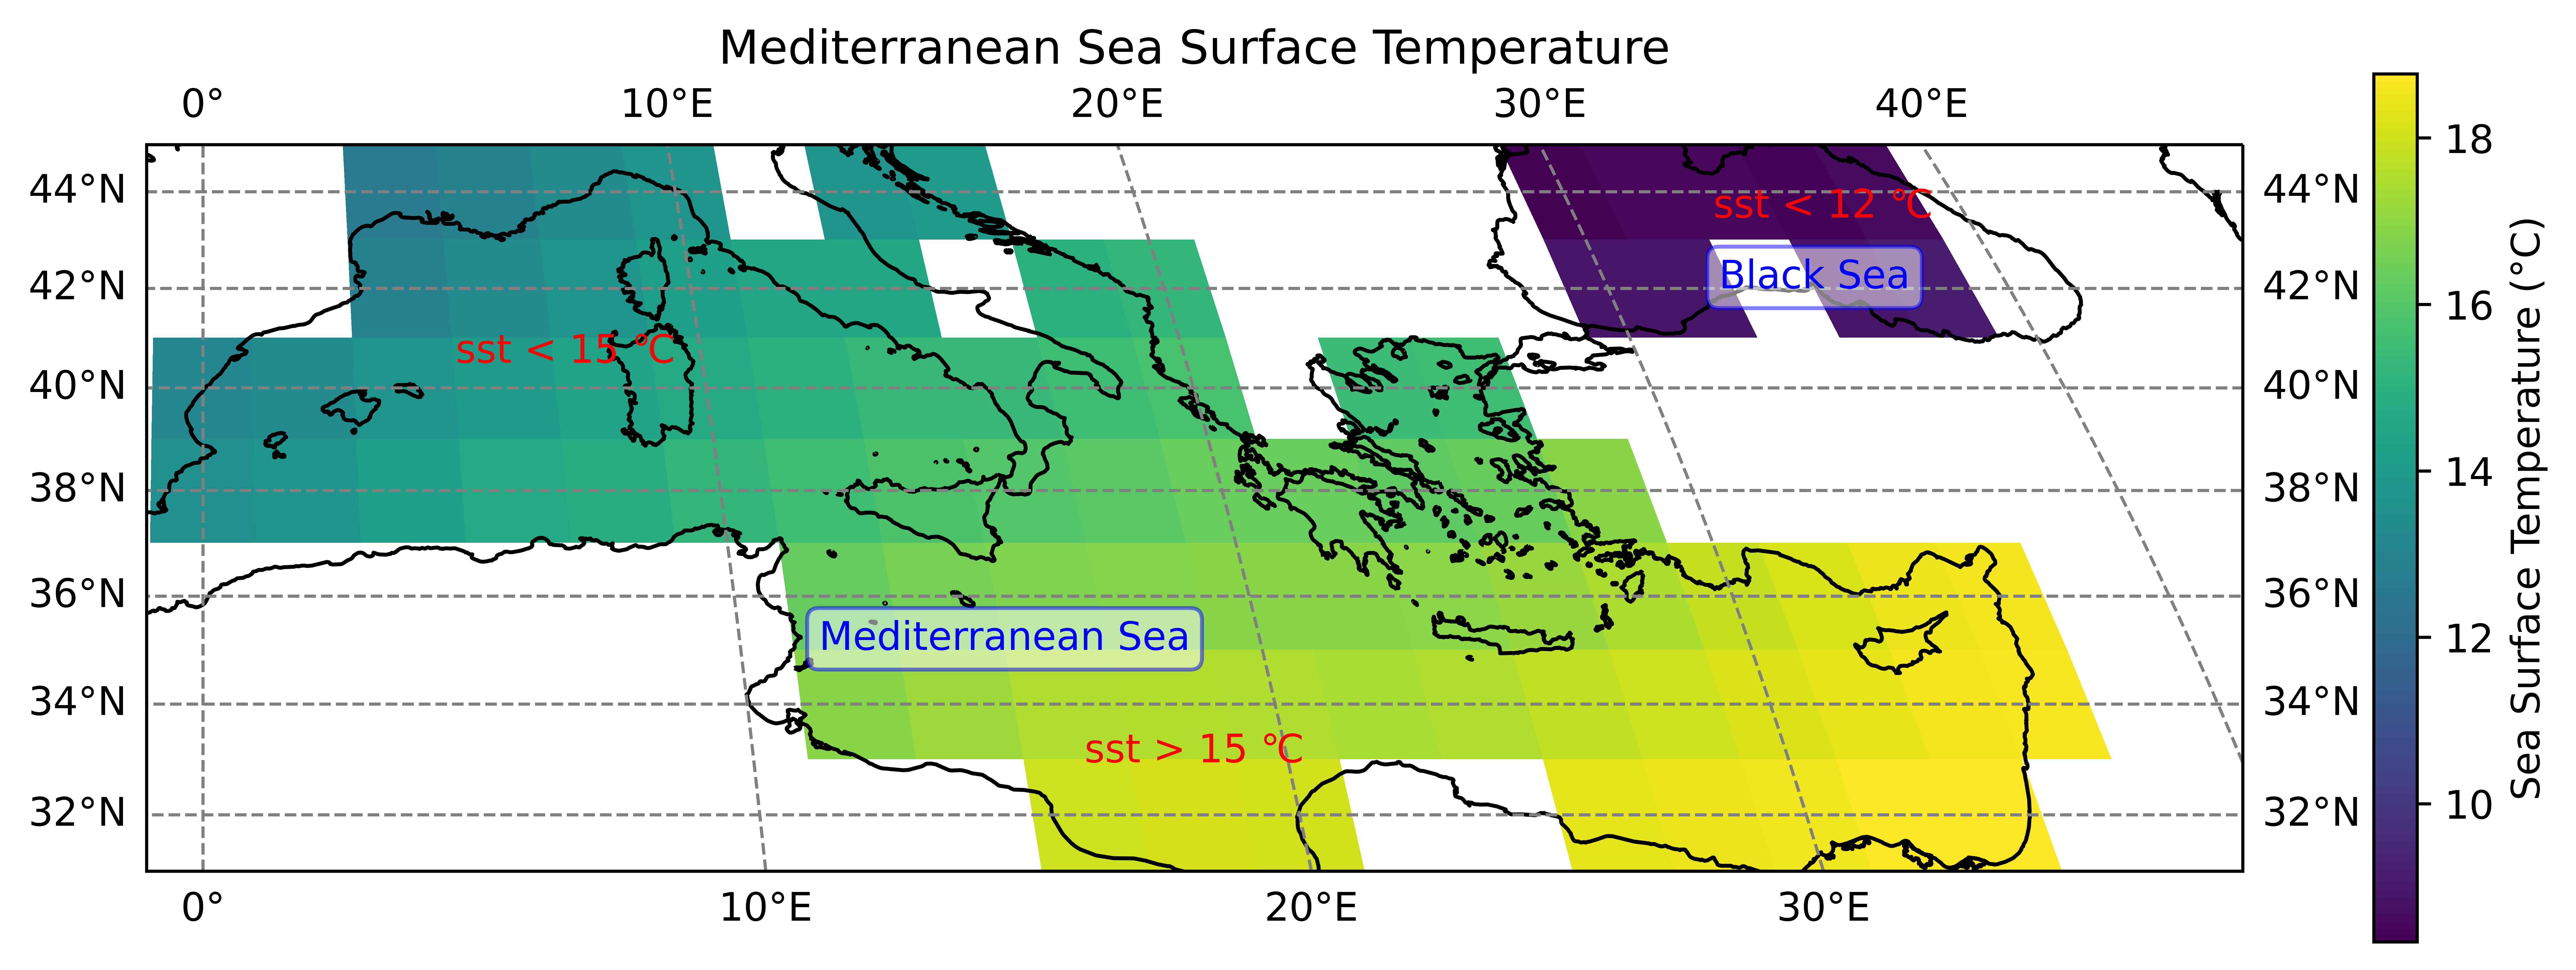

In [5]:
data = ds['sst']

# 提取地中海区域的数据,使用sel对data中lat进行索引的时候是空值？
mediterranean_data = data.where((data['lat'] > 30) & (data['lat'] < 45) & (data['lon'] > -20) & (data['lon'] < 40), drop=True)

# 使用 Lambert Conformal 投影
fig, ax = plt.subplots(figsize=(12, 8), dpi=1000, subplot_kw={'projection': ccrs.Orthographic()})

# 画出地中海的表面温度，time取第一个数据
c = ax.pcolormesh(mediterranean_data['lon'], mediterranean_data['lat'], mediterranean_data.isel(time=0),
                  cmap='viridis', transform=ccrs.PlateCarree())

# 建立 x.y 坐标以及范围，不需要添加x,y的范围
ax.set_xlabel('Longitude')
#ax.set_xticks([-20, 0, 20, 40])
ax.set_ylabel('Latitude')
#ax.set_yticks([30, 35, 40, 45])

# 画出标题
ax.set_title('Mediterranean Sea Surface Temperature')

# 设置网格线
ax.gridlines(draw_labels=True, linestyle='--', color='gray')

# 添加颜色条垂直右侧
cb = plt.colorbar(c, label='Sea Surface Temperature (°C)', orientation='vertical', shrink=0.5)

# 加入海岸线，加入国家线的时候需要下载地图，解压之后一直运用不了
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# 在地图不同温度区域加上注释
ax.annotate('sst < 15 ℃', xy=(0.2, 0.7), xycoords='axes fraction', fontsize=10, ha='center',color='red')
ax.annotate('sst < 12 ℃', xy=(0.8, 0.9), xycoords='axes fraction', fontsize=10, ha='center',color='red')
ax.annotate('sst > 15 ℃', xy=(0.5, 0.15), xycoords='axes fraction', fontsize=10, ha='center',color='red')

#加上文本框标注出黑海与地中海
props = dict(boxstyle='round', facecolor='white', edgecolor='blue', alpha=0.5)
ax.text(35, 42, 'Black Sea', transform=ccrs.PlateCarree(), fontsize=10, ha='center', color='blue', bbox=props)
ax.text(15, 35, 'Mediterranean Sea', transform=ccrs.PlateCarree(), fontsize=10, ha='center', color='blue', bbox=props)


plt.show()

### 第二题代码运行正常，图件正确，要素满足要求。
### 代码清晰精炼。
### 得分：21/20
### --------------------------------------------------------------------------------------------